<div class="alert alert-block alert-danger">
    
<b>The success rankings in the fields specified in the table will be examined on a club basis.</b>
    
</div>

<div class="alert alert-block alert-danger">
    
<b>Dataset belongs to the 2020-2021 euroleague season</b>
    
</div>

In [2]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import warnings;
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("Euroleague 2020-2021.xlsx")
df

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,...,Blocks(Fv),Blocks(Fv)_avg,Blocks(Ag),Blocks(Ag)_avg,Fouls(Cm),Fouls(Cm)_avg,Fouls(Rv),Fouls(Rv)_avg,PIR,PIR_avg
0,"Abalde, Alberto",Real Madrid,6,Forward,Spain,25,202,39,761,281,...,0,0.00,6,0.15,60,1.54,57,1.46,325,8.33
1,"Abrines, Alex",FC Barcelona,21,Forward,Spain,27,198,39,730,237,...,8,0.21,7,0.18,96,2.46,39,1.00,182,4.67
2,"Alocen, Carlos",Real Madrid,12,Guard,Spain,20,194,28,376,110,...,2,0.07,4,0.14,46,1.64,31,1.11,93,3.32
3,"Amaize, Robin",FC Bayern Munich,15,Forward,Germany,26,188,9,51,4,...,0,0.00,1,0.11,6,0.67,2,0.22,-1,-0.11
4,"Anderson, James",Anadolu Efes,23,Forward,USA,31,198,41,622,172,...,6,0.15,3,0.07,55,1.34,39,0.95,234,5.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,3,Guard,Russian Federation,27,192,17,82,15,...,1,0.06,0,0.00,20,1.18,12,0.71,6,0.35
290,"Zipser, Paul",FC Bayern Munich,16,Forward,Germany,26,203,39,858,356,...,10,0.26,5,0.13,86,2.21,74,1.90,371,9.51
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,23,Center,Croatia,23,210,34,676,309,...,26,0.76,17,0.50,56,1.65,58,1.71,386,11.35
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,50,Guard,Poland,22,200,11,150,29,...,0,0.00,1,0.09,22,2.00,7,0.64,18,1.64


In [4]:
df.columns

Index(['Player', 'Club', 'Number', 'Position', 'Nation', 'Age', 'Height',
       'Games', 'Min', 'Pts', 'Pts_avg', '2FG', '3FG', 'FT', 'Rebounds(O)',
       'Rebounds(D)', 'Rebounds(T)', 'Rebounds_avg', 'Assists', 'Assists_avg',
       'Steals', 'Steals_avg', 'Turnovers', 'Turnovers_avg', 'Blocks(Fv)',
       'Blocks(Fv)_avg', 'Blocks(Ag)', 'Blocks(Ag)_avg', 'Fouls(Cm)',
       'Fouls(Cm)_avg', 'Fouls(Rv)', 'Fouls(Rv)_avg', 'PIR', 'PIR_avg'],
      dtype='object')

In [5]:
df[['2FG_Shots', '2FG_Attempts']] = df['2FG'].str.split('/', expand=True).astype('int64')
df[['3FG_Shots', '3FG_Attempts']] = df['3FG'].str.split('/', expand=True).astype('int64')
df[['FT_Shots', 'FT_Attempts']] = df['FT'].str.split('/', expand=True).astype('int64')

In [6]:
df['Total_Shots'] = (df['2FG_Shots'] + df['3FG_Shots'] + df['FT_Shots'])
df['Total_Attempts'] = (df['2FG_Attempts'] + df['3FG_Attempts'] + df['FT_Attempts'])

In [7]:
df.columns

Index(['Player', 'Club', 'Number', 'Position', 'Nation', 'Age', 'Height',
       'Games', 'Min', 'Pts', 'Pts_avg', '2FG', '3FG', 'FT', 'Rebounds(O)',
       'Rebounds(D)', 'Rebounds(T)', 'Rebounds_avg', 'Assists', 'Assists_avg',
       'Steals', 'Steals_avg', 'Turnovers', 'Turnovers_avg', 'Blocks(Fv)',
       'Blocks(Fv)_avg', 'Blocks(Ag)', 'Blocks(Ag)_avg', 'Fouls(Cm)',
       'Fouls(Cm)_avg', 'Fouls(Rv)', 'Fouls(Rv)_avg', 'PIR', 'PIR_avg',
       '2FG_Shots', '2FG_Attempts', '3FG_Shots', '3FG_Attempts', 'FT_Shots',
       'FT_Attempts', 'Total_Shots', 'Total_Attempts'],
      dtype='object')

<div class="alert alert-block alert-danger">
    
<b>Creating new dataframe on a club basis</b>
    
</div>

***

In [9]:
clubs1 = df.groupby('Club')[['Pts','2FG_Shots','2FG_Attempts','3FG_Shots','3FG_Attempts','FT_Shots','FT_Attempts', 
                             'Total_Shots','Total_Attempts','Rebounds(O)','Rebounds(D)','Rebounds(T)','Assists',
                             'Steals','Turnovers','Blocks(Fv)','Blocks(Ag)']].sum()

In [10]:
clubs1.reset_index(inplace=True)

In [11]:
clubs1

,Club,Pts,2FG_Shots,2FG_Attempts,3FG_Shots,3FG_Attempts,FT_Shots,FT_Attempts,Total_Shots,Total_Attempts,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag)
0,AX Armani Exchange Milan,3344,797,1548,387,935,589,721,1773,3204,283,881,1164,642,252,437,92,101
1,Alba Berlin,2674,647,1227,342,937,354,424,1343,2588,282,684,966,692,235,473,74,97
2,Anadolu Efes,3453,795,1402,418,1046,609,767,1822,3215,297,853,1150,736,272,443,119,103
3,Baskonia Vitoria-Gasteiz,2751,685,1288,314,807,439,574,1438,2669,327,746,1073,683,282,462,97,85
4,CSKA Moscow,3281,759,1418,388,1034,599,786,1746,3238,418,834,1252,612,256,447,82,104
5,Crvena Zvezda Mts Belgrade,2520,587,1198,292,772,470,582,1349,2552,275,668,943,496,220,421,60,91
6,FC Barcelona,3280,855,1595,324,812,598,755,1777,3162,364,886,1250,727,270,565,108,96
7,FC Bayern Munich,3066,831,1626,281,736,561,703,1673,3065,300,832,1132,636,304,472,86,70
8,Fenerbahce Beko Istanbul,2880,781,1370,301,761,415,503,1497,2634,228,752,980,671,241,504,72,84
9,Khimki Moscow Region,2634,620,1205,315,910,449,554,1384,2669,252,708,960,618,238,449,111,80


In [12]:
clubs1['2FG_Avg'] = round((clubs1['2FG_Shots'] / clubs1['2FG_Attempts']), 4)
clubs1['3FG_Avg'] = round((clubs1['3FG_Shots'] / clubs1['3FG_Attempts']), 4)
clubs1['FT_Avg'] = round((clubs1['FT_Shots'] / clubs1['FT_Attempts']), 4)
clubs1['Total_Avg'] = round((clubs1['Total_Shots'] / clubs1['Total_Attempts']), 4)

In [13]:
clubs2 = clubs1[['Club','Pts','2FG_Avg','3FG_Avg','FT_Avg','Total_Avg','Rebounds(O)','Rebounds(D)','Rebounds(T)',
                 'Assists','Steals','Turnovers','Blocks(Fv)','Blocks(Ag)']]

In [14]:
clubs2               

,Club,Pts,2FG_Avg,3FG_Avg,FT_Avg,Total_Avg,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag)
0,AX Armani Exchange Milan,3344,0.5149,0.4139,0.8169,0.5534,283,881,1164,642,252,437,92,101
1,Alba Berlin,2674,0.5273,0.3650,0.8349,0.5189,282,684,966,692,235,473,74,97
2,Anadolu Efes,3453,0.5670,0.3996,0.7940,0.5667,297,853,1150,736,272,443,119,103
3,Baskonia Vitoria-Gasteiz,2751,0.5318,0.3891,0.7648,0.5388,327,746,1073,683,282,462,97,85
4,CSKA Moscow,3281,0.5353,0.3752,0.7621,0.5392,418,834,1252,612,256,447,82,104
5,Crvena Zvezda Mts Belgrade,2520,0.4900,0.3782,0.8076,0.5286,275,668,943,496,220,421,60,91
6,FC Barcelona,3280,0.5361,0.3990,0.7921,0.5620,364,886,1250,727,270,565,108,96
7,FC Bayern Munich,3066,0.5111,0.3818,0.7980,0.5458,300,832,1132,636,304,472,86,70
8,Fenerbahce Beko Istanbul,2880,0.5701,0.3955,0.8250,0.5683,228,752,980,671,241,504,72,84
9,Khimki Moscow Region,2634,0.5145,0.3462,0.8105,0.5185,252,708,960,618,238,449,111,80


In [15]:
clubs2.insert(1, 'Games', [41,34,41,34,39,34,41,39,37,34,34,34,34,34,39,34,34,39])

In [16]:
clubs2

,Club,Games,Pts,2FG_Avg,3FG_Avg,FT_Avg,Total_Avg,Rebounds(O),Rebounds(D),Rebounds(T),Assists,Steals,Turnovers,Blocks(Fv),Blocks(Ag)
0,AX Armani Exchange Milan,41,3344,0.5149,0.4139,0.8169,0.5534,283,881,1164,642,252,437,92,101
1,Alba Berlin,34,2674,0.5273,0.3650,0.8349,0.5189,282,684,966,692,235,473,74,97
2,Anadolu Efes,41,3453,0.5670,0.3996,0.7940,0.5667,297,853,1150,736,272,443,119,103
3,Baskonia Vitoria-Gasteiz,34,2751,0.5318,0.3891,0.7648,0.5388,327,746,1073,683,282,462,97,85
4,CSKA Moscow,39,3281,0.5353,0.3752,0.7621,0.5392,418,834,1252,612,256,447,82,104
5,Crvena Zvezda Mts Belgrade,34,2520,0.4900,0.3782,0.8076,0.5286,275,668,943,496,220,421,60,91
6,FC Barcelona,41,3280,0.5361,0.3990,0.7921,0.5620,364,886,1250,727,270,565,108,96
7,FC Bayern Munich,39,3066,0.5111,0.3818,0.7980,0.5458,300,832,1132,636,304,472,86,70
8,Fenerbahce Beko Istanbul,37,2880,0.5701,0.3955,0.8250,0.5683,228,752,980,671,241,504,72,84
9,Khimki Moscow Region,34,2634,0.5145,0.3462,0.8105,0.5185,252,708,960,618,238,449,111,80


***

<div class="alert alert-block alert-danger">
    
<b>Points Average Per Game</b>
    
</div>

In [17]:
clubs2['Avg_Pts'] = round((clubs2['Pts'] / clubs2['Games']),2)

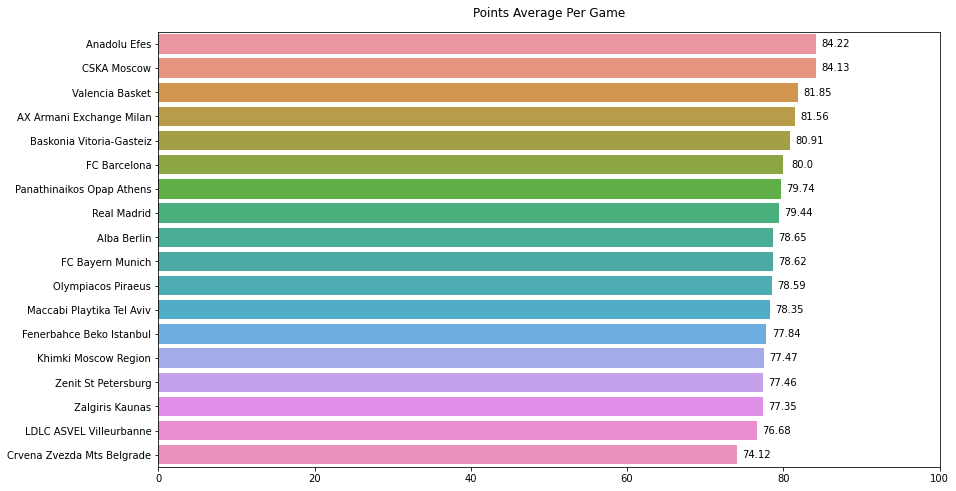

In [18]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Pts']].sort_values('Avg_Pts', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Pts']].sort_values('Avg_Pts', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+2.5, y=i, s=str(b[i]), ha='center', va='center', fontsize=10, alpha=1)

ax.set_xlim(0, 100)
ax.set_title('Points Average Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of 2FG</b>
    
</div>

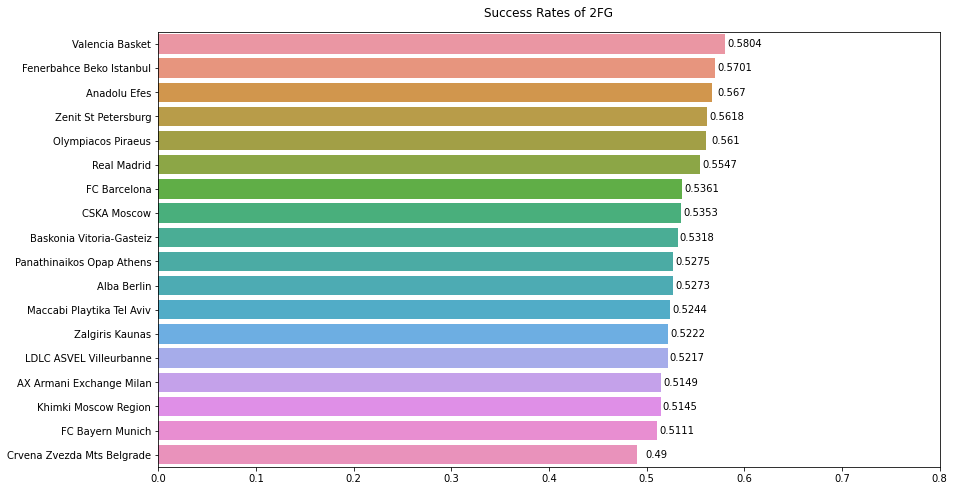

In [19]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', '2FG_Avg']].sort_values('2FG_Avg', ascending=False).values[:,0]
b = clubs2[['Club', '2FG_Avg']].sort_values('2FG_Avg', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.02, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 0.8)
ax.set_title('Success Rates of 2FG', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of 3FG</b>
    
</div>

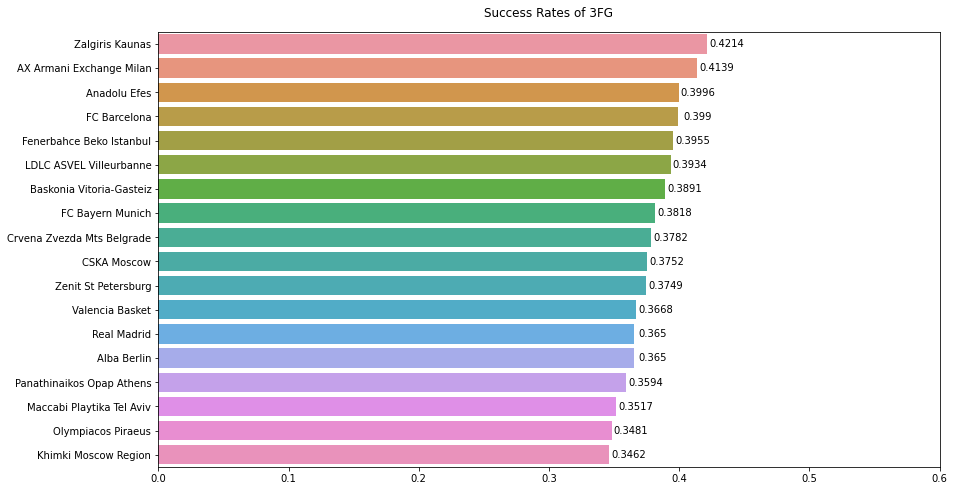

In [20]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', '3FG_Avg']].sort_values('3FG_Avg', ascending=False).values[:,0]
b = clubs2[['Club', '3FG_Avg']].sort_values('3FG_Avg', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.015, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 0.6)
ax.set_title('Success Rates of 3FG', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of FT</b>
    
</div>

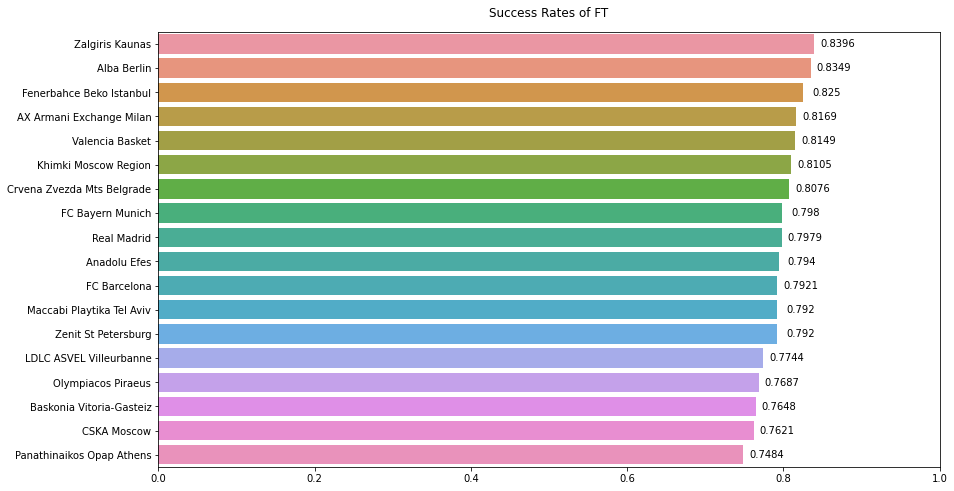

In [21]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'FT_Avg']].sort_values('FT_Avg', ascending=False).values[:,0]
b = clubs2[['Club', 'FT_Avg']].sort_values('FT_Avg', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.03, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 1)
ax.set_title('Success Rates of FT', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Total Shooting Averages</b>
    
</div>

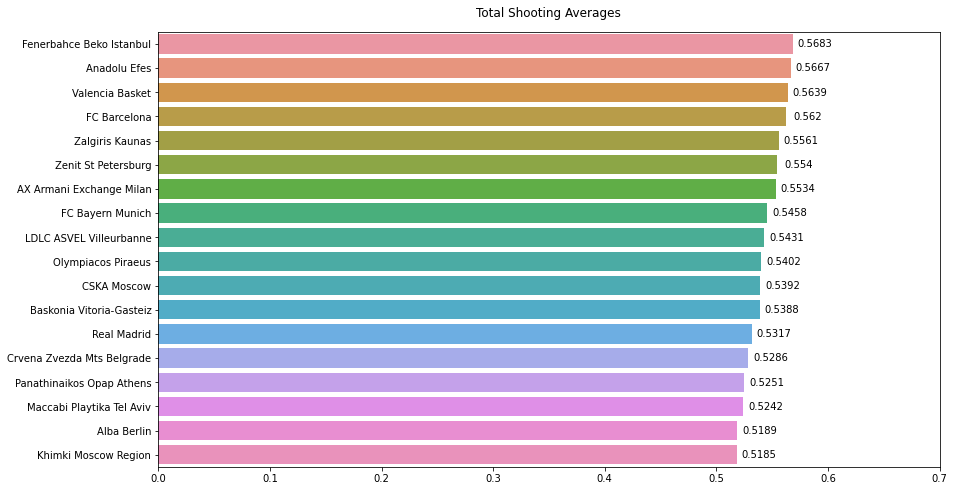

In [22]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Total_Avg']].sort_values('Total_Avg', ascending=False).values[:,0]
b = clubs2[['Club', 'Total_Avg']].sort_values('Total_Avg', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.02, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 0.7)
ax.set_title('Total Shooting Averages', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Offensive Rebounds</b>
    
</div>

In [25]:
clubs2['Avg_Rebounds(O)'] = round((clubs2['Rebounds(O)'] / clubs2['Games']),4)

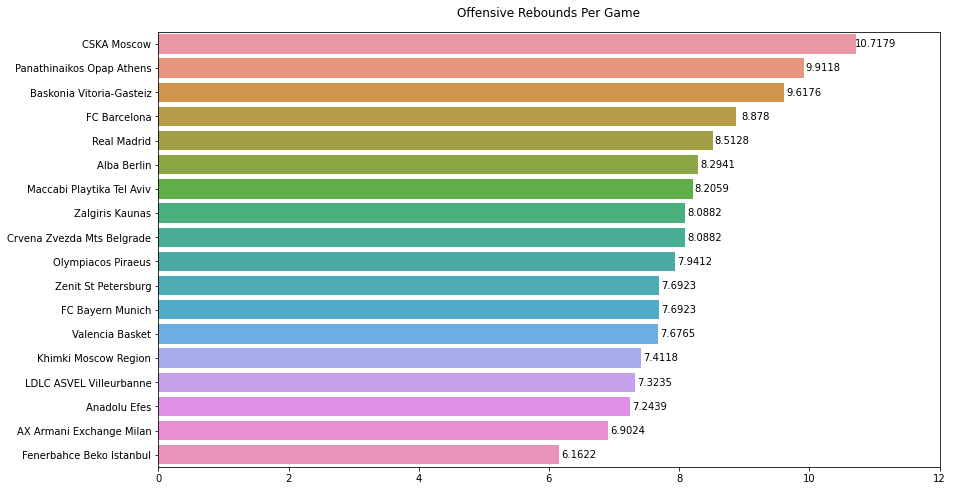

In [52]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Rebounds(O)']].sort_values('Avg_Rebounds(O)', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Rebounds(O)']].sort_values('Avg_Rebounds(O)', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.30, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 12)
ax.set_title('Offensive Rebounds Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Defensive Rebounds</b>
    
</div>

In [28]:
clubs2['Avg_Rebounds(D)'] = round((clubs2['Rebounds(D)'] / clubs2['Games']),3)

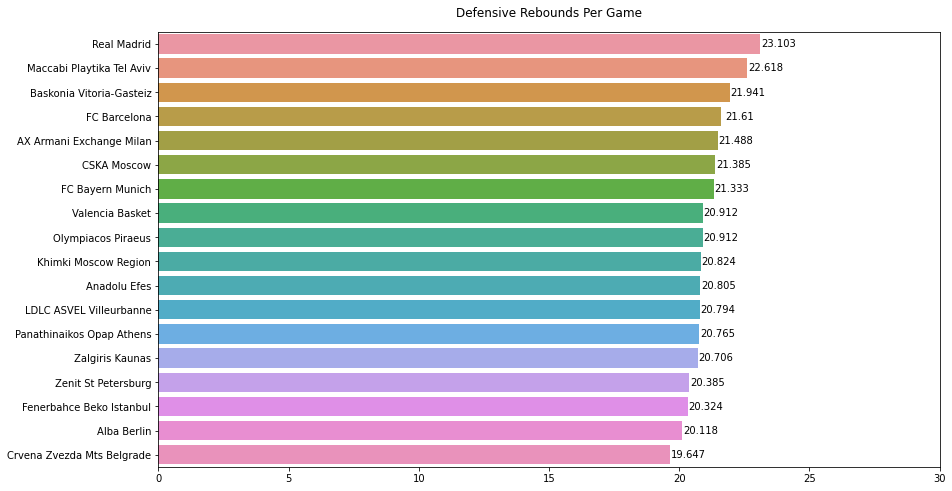

In [51]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Rebounds(D)']].sort_values('Avg_Rebounds(D)', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Rebounds(D)']].sort_values('Avg_Rebounds(D)', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.70, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 30)
ax.set_title('Defensive Rebounds Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Total Rebounds</b>
    
</div>

In [32]:
clubs2['Avg_Rebounds(T)'] = round((clubs2['Rebounds(T)'] / clubs2['Games']),2)

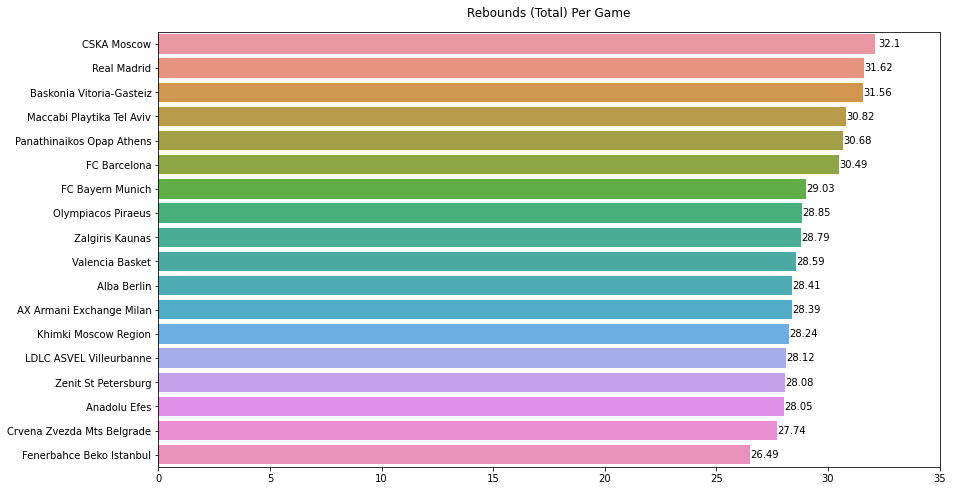

In [50]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Rebounds(T)']].sort_values('Avg_Rebounds(T)', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Rebounds(T)']].sort_values('Avg_Rebounds(T)', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.65, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 35)
ax.set_title('Rebounds (Total) Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Assists</b>
    
</div>

In [34]:
clubs2['Avg_Assists'] = round((clubs2['Assists'] / clubs2['Games']),2)

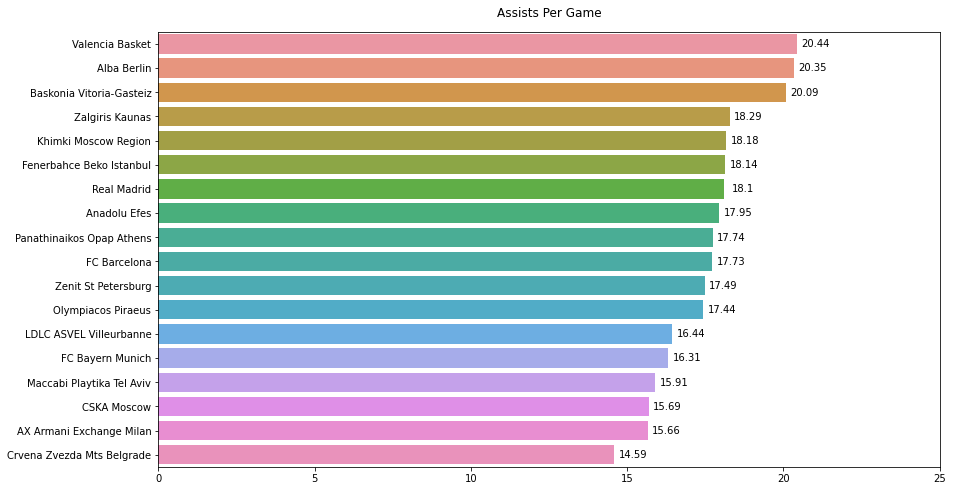

In [49]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Assists']].sort_values('Avg_Assists', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Assists']].sort_values('Avg_Assists', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.6, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 25)
ax.set_title('Assists Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Steals</b>
    
</div>

In [40]:
clubs2['Avg_Steals'] = round((clubs2['Steals'] / clubs2['Games']),3)

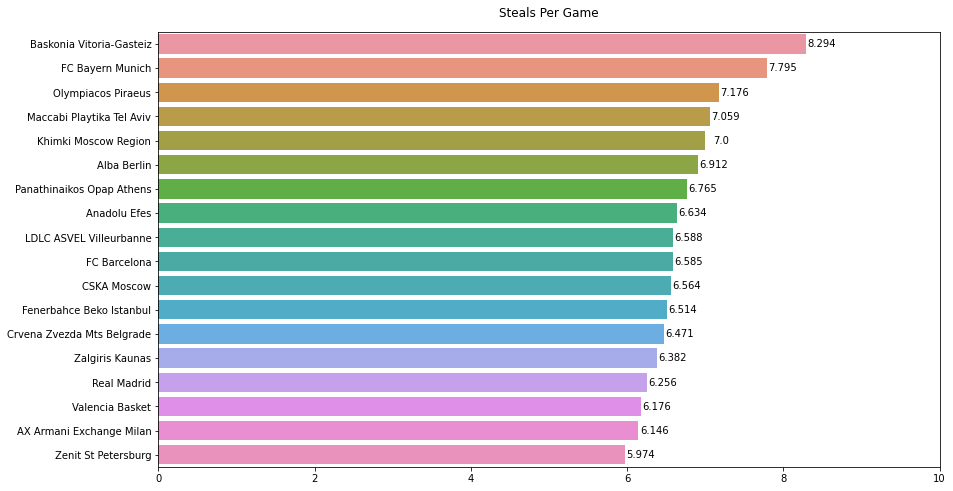

In [48]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Steals']].sort_values('Avg_Steals', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Steals']].sort_values('Avg_Steals', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.2, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 10)
ax.set_title('Steals Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Turnovers</b>
    
</div>

In [42]:
clubs2['Avg_Turnovers'] = round((clubs2['Turnovers'] / clubs2['Games']),2)

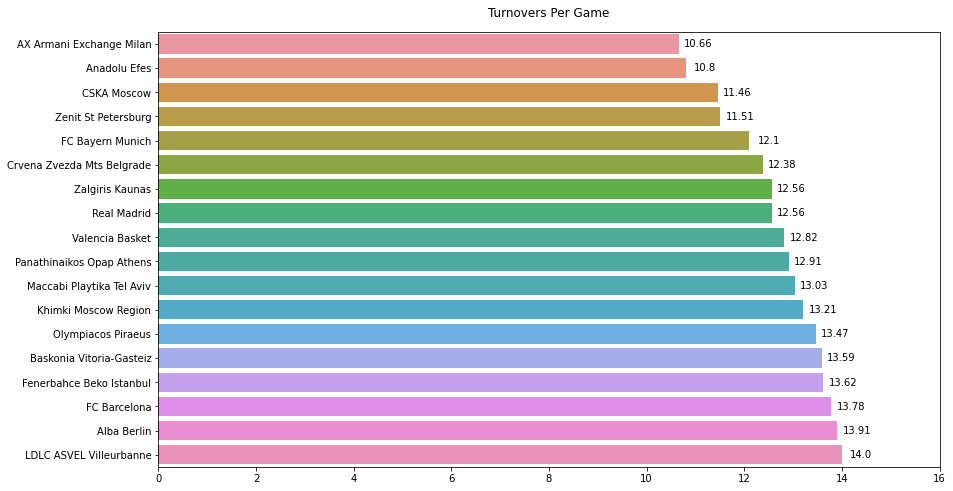

In [47]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Turnovers']].sort_values('Avg_Turnovers').values[:,0]
b = clubs2[['Club', 'Avg_Turnovers']].sort_values('Avg_Turnovers').values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.4, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 16)
ax.set_title('Turnovers Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Blocks (In Favor)</b>
    
</div>

In [55]:
clubs2['Avg_Blocks(Fv)'] = round((clubs2['Blocks(Fv)'] / clubs2['Games']),2)

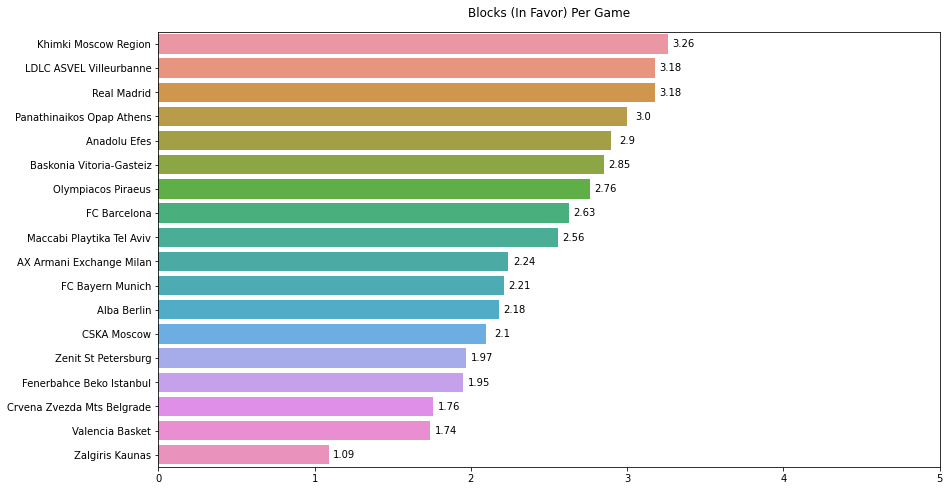

In [59]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Blocks(Fv)']].sort_values('Avg_Blocks(Fv)', ascending=False).values[:,0]
b = clubs2[['Club', 'Avg_Blocks(Fv)']].sort_values('Avg_Blocks(Fv)', ascending=False).values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.1, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 5)
ax.set_title('Blocks (In Favor) Per Game', pad=15);

***

<div class="alert alert-block alert-danger">
    
<b>Success Rates of Blocks (Against)</b>
    
</div>

In [61]:
clubs2['Avg_Blocks(Ag)'] = round((clubs2['Blocks(Ag)'] / clubs2['Games']),2)

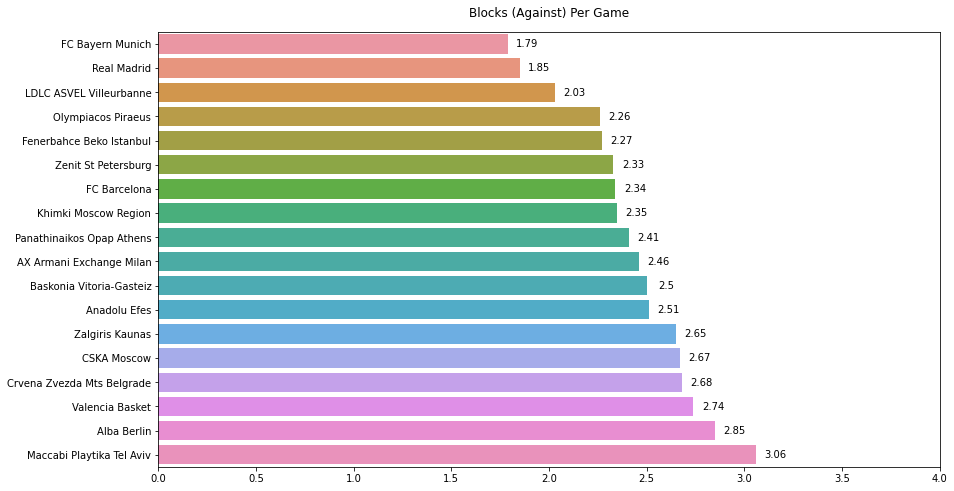

In [64]:
fig, ax = plt.subplots(figsize=(14,8))

a = clubs2[['Club', 'Avg_Blocks(Ag)']].sort_values('Avg_Blocks(Ag)').values[:,0]
b = clubs2[['Club', 'Avg_Blocks(Ag)']].sort_values('Avg_Blocks(Ag)').values[:,1]

sns.barplot(y=a, x=b)

for i in range(len(a)):
        ax.text(x=b[i]+0.1, y=i, s=str(b[i]), ha='center', va='center', fontsize=10)

ax.set_xlim(0, 4)
ax.set_title('Blocks (Against) Per Game', pad=15);

***